In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('salary.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# PRE-PROCESSING

In [4]:
# Missing values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
print(df['native-country'].value_counts().keys())

Index([' United-States', ' Mexico', ' ?', ' Philippines', ' Germany',
       ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba',
       ' England', ' Jamaica', ' South', ' China', ' Italy',
       ' Dominican-Republic', ' Vietnam', ' Guatemala', ' Japan', ' Poland',
       ' Columbia', ' Taiwan', ' Haiti', ' Iran', ' Portugal', ' Nicaragua',
       ' Peru', ' France', ' Greece', ' Ecuador', ' Ireland', ' Hong',
       ' Cambodia', ' Trinadad&Tobago', ' Laos', ' Thailand', ' Yugoslavia',
       ' Outlying-US(Guam-USVI-etc)', ' Honduras', ' Hungary', ' Scotland',
       ' Holand-Netherlands'],
      dtype='object')


In [6]:
# EDA
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

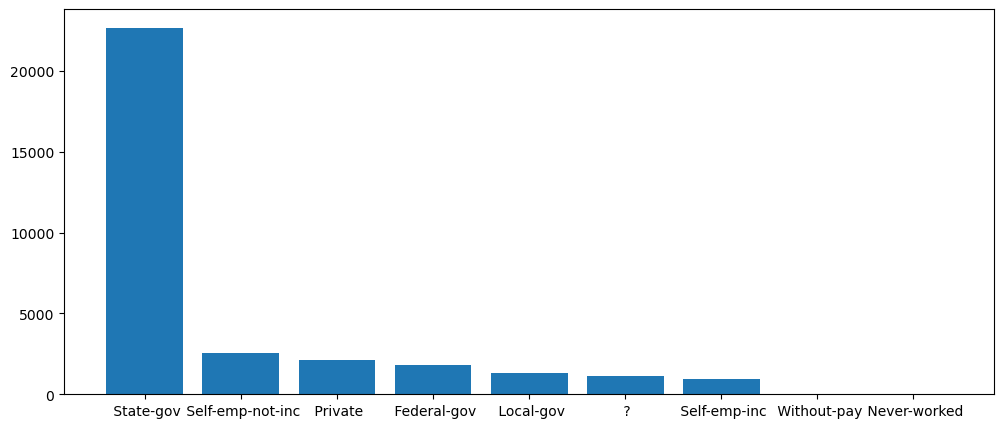

In [7]:
plt.figure(figsize=(12,5))
plt.bar(list(df['workclass'].unique()), list(df['workclass'].value_counts()))
plt.show()

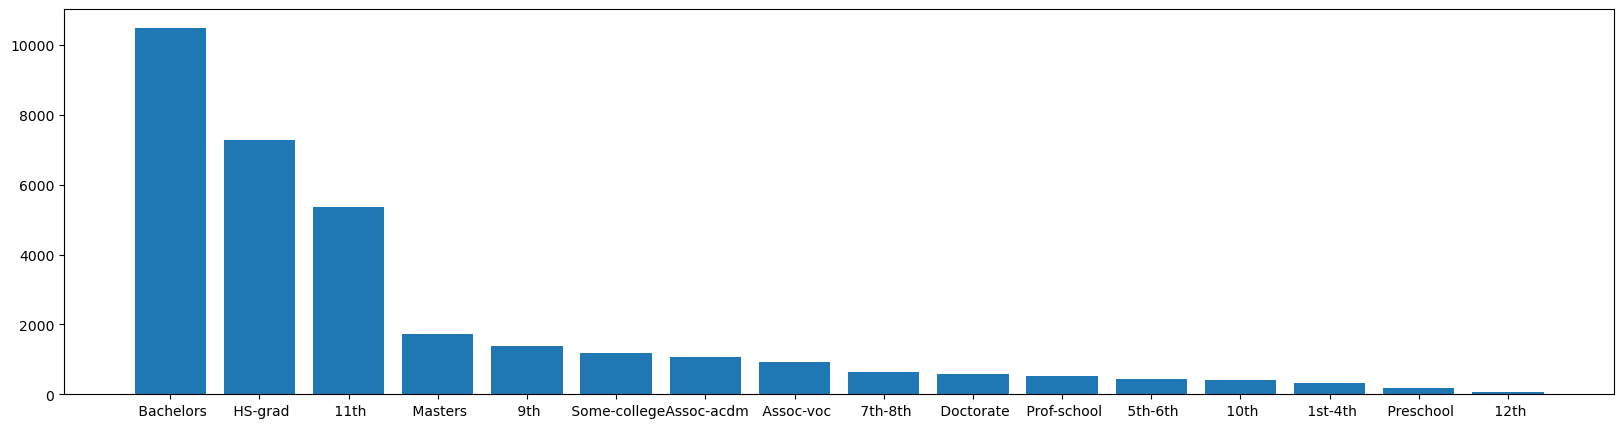

In [8]:
plt.figure(figsize=(20,5))
plt.bar(list(df['education'].unique()), list(df['education'].value_counts()))
plt.show()

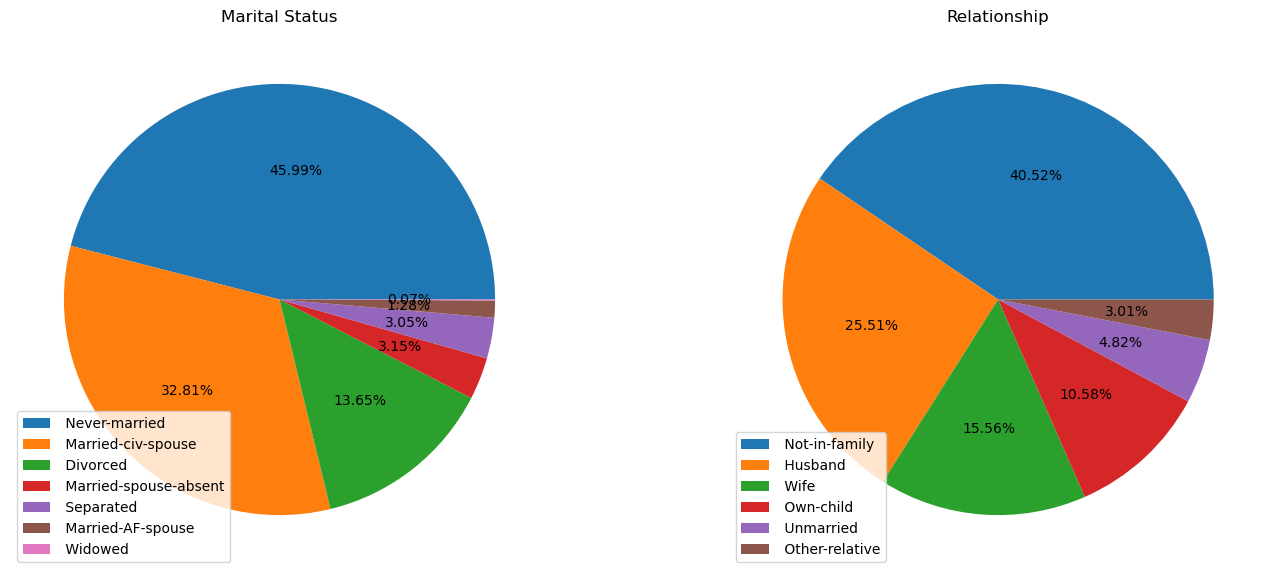

In [9]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title("Marital Status")
plt.pie(list(df['marital-status'].value_counts()), autopct="%.2f%%")
plt.legend(df['marital-status'].unique(), loc="lower left")
plt.subplot(1,2,2)
plt.title("Relationship")
plt.pie(list(df['relationship'].value_counts()), autopct="%0.2f%%")
plt.legend(df['relationship'].unique(), loc="lower left")
plt.show()

# **ONE-HOT ENCODING USING LABEL ENCODER**

In [22]:
encoder = LabelEncoder()
categorical_features = df.columns.tolist()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0
32560,35,5,17825,11,8,2,4,5,4,0,108,0,39,39,1


1. created a list of all the columns (excluding salary)
2. one hot encoding of all the columns and storing the values into the same column

In [11]:
# Split the dataset
x_data = df.drop(columns='salary', axis=1)
x_data = x_data.drop(columns='fnlwgt', axis=1)
x_data = x_data.drop(columns='education', axis=1)
y_data = df['salary']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [13]:
print(df.shape, x_data.shape, X_train.shape, X_test.shape)

(32561, 15) (32561, 12) (26048, 12) (6513, 12)


In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.8192845079072624

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4918
           1       0.70      0.46      0.55      1595

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



In [21]:
import pickle
pickle.dump(model, open('salary.pkl','wb'))

In [24]:
test_data = [[47, 7, 12, 0, 6, 1, 2, 1, 100, 0, 35, 39]]
model.predict(test_data)

c:\Users\thisi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [20]:
print(df['native-country'].value_counts().keys())

Int64Index([39, 26,  0, 30, 11,  2, 33,  8, 19,  5,  9, 23, 35,  3, 22,  6, 40,
            13, 24, 31,  4, 36, 14, 20, 32, 27, 29, 10, 12,  7, 21, 17,  1, 38,
            25, 37, 41, 28, 16, 18, 34, 15],
           dtype='int64')
